# Shubham Singh 21BAI1070


# Import the necessary Libraries to implement PCA.


In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reading and Understanding the Dataset


In [100]:
df = pd.read_csv('wine.data.csv')
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [101]:
df.info()

print("Dimensions:", df.shape)
print("Datatypes:\n", df.dtypes)
df.info()

df.describe()

object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

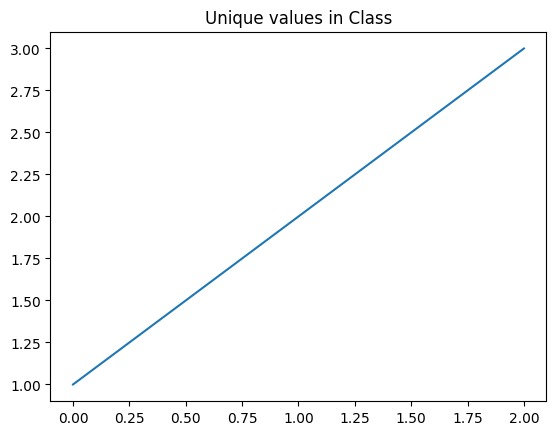

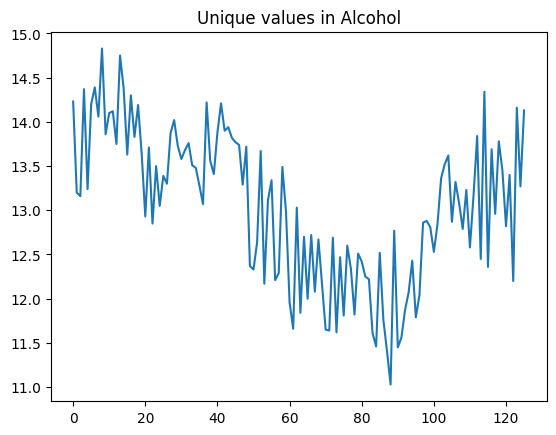

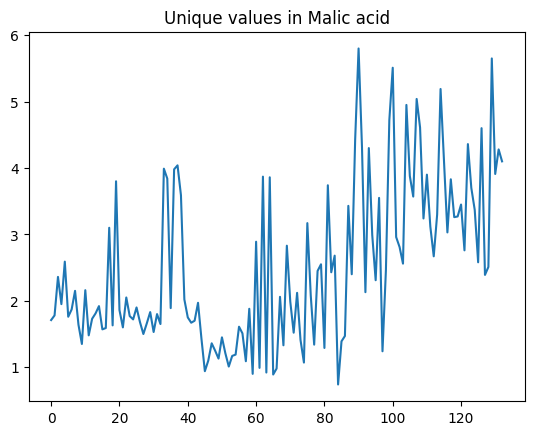

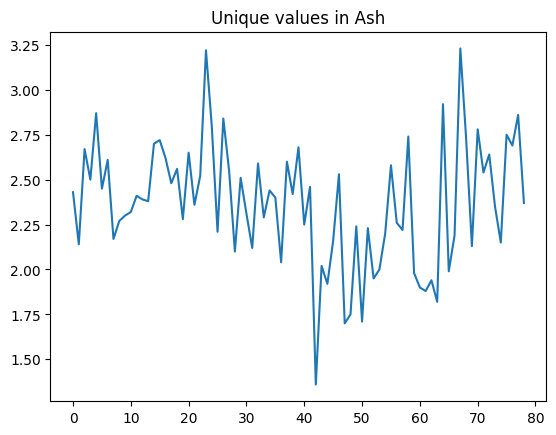

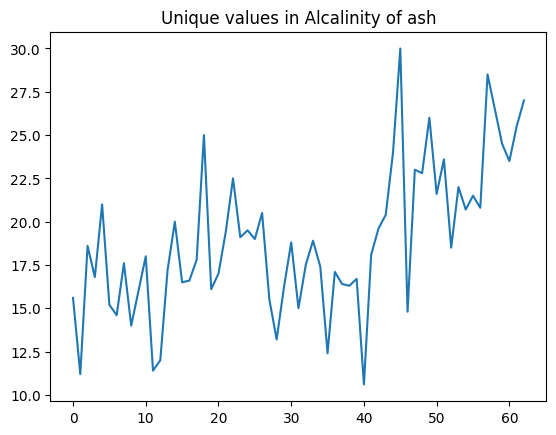

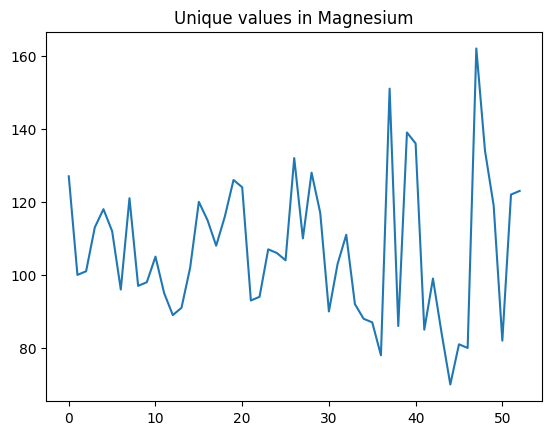

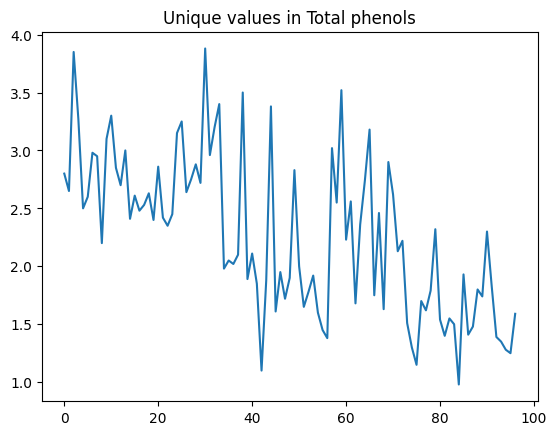

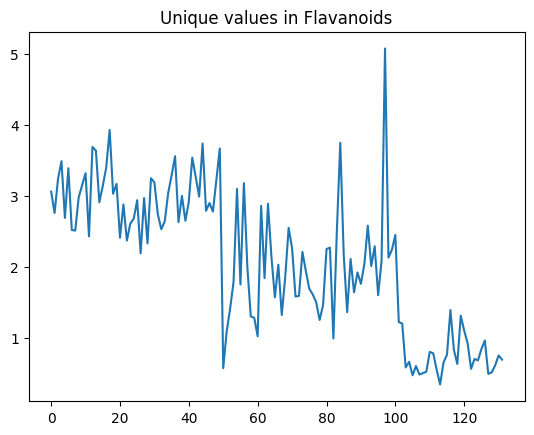

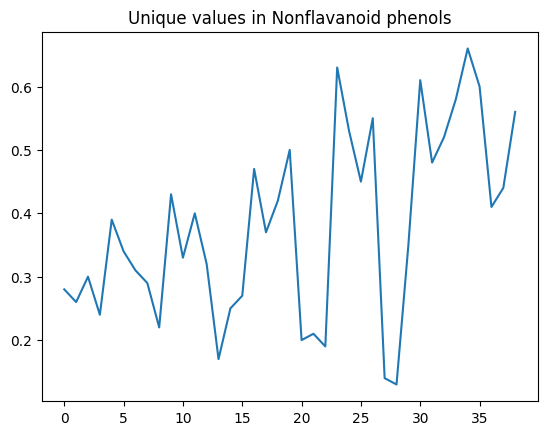

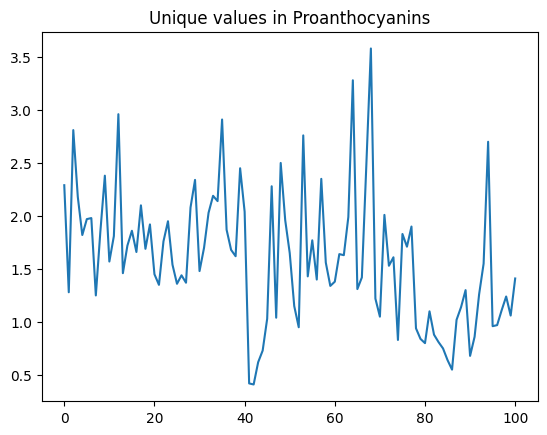

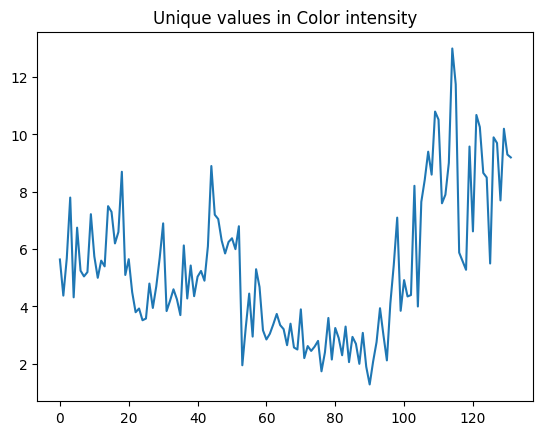

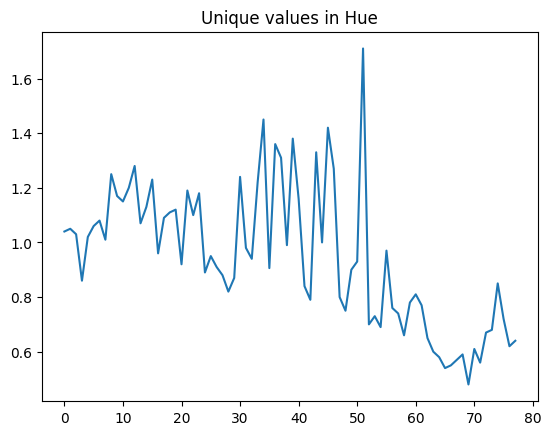

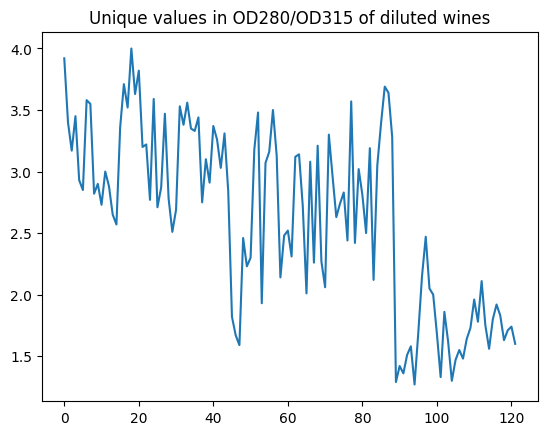

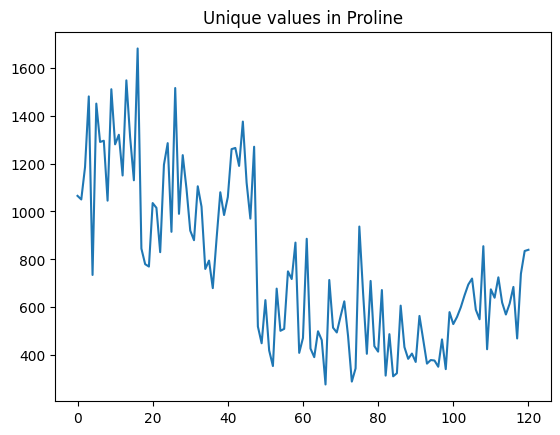

In [102]:
for column in df.columns:
    unique_values = df[column].unique()
    plt.figure()
    plt.title(f"Unique values in {column}")
    plt.plot(unique_values)
    plt.show()

In [103]:
df.dropna(inplace=True)

In [104]:
negative_values = df[df['Nonflavanoid phenols'] < 0]
print(negative_values)

Empty DataFrame
Columns: [Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []


In [105]:
df.head

<bound method NDFrame.head of      Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06              

# Data Cleaning


In [106]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

duplicated_data = df.duplicated()
print("Duplicated data:")
print(df[duplicated_data])

Missing values:
Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
Duplicated data:
Empty DataFrame
Columns: [Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []


# Separate numerical and categorical features


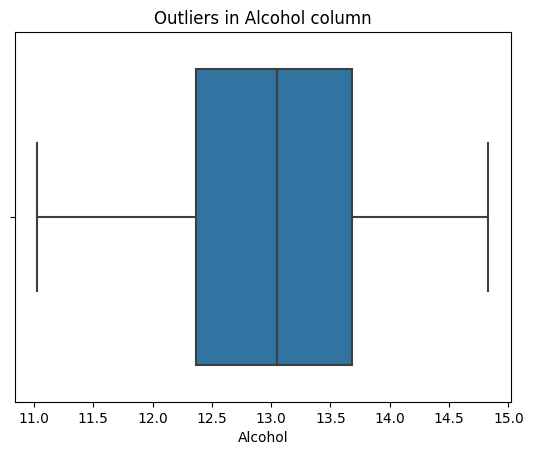

In [107]:
sns.boxplot(x=df['Alcohol'])
plt.xlabel('Alcohol')
plt.title('Outliers in Alcohol column')
plt.show()

In [108]:
alcohol_skewness = skew(df['Alcohol'])
print("Skewness of 'Alcohol' column:", alcohol_skewness)

if alcohol_skewness > 0:
    print("The 'Alcohol' column is right-skewed.")
elif alcohol_skewness < 0:
    print("The 'Alcohol' column is left-skewed.")
else:
    print("The 'Alcohol' column is approximately symmetric.")


Skewness of 'Alcohol' column: -0.05104747165391963
The 'Alcohol' column is left-skewed.


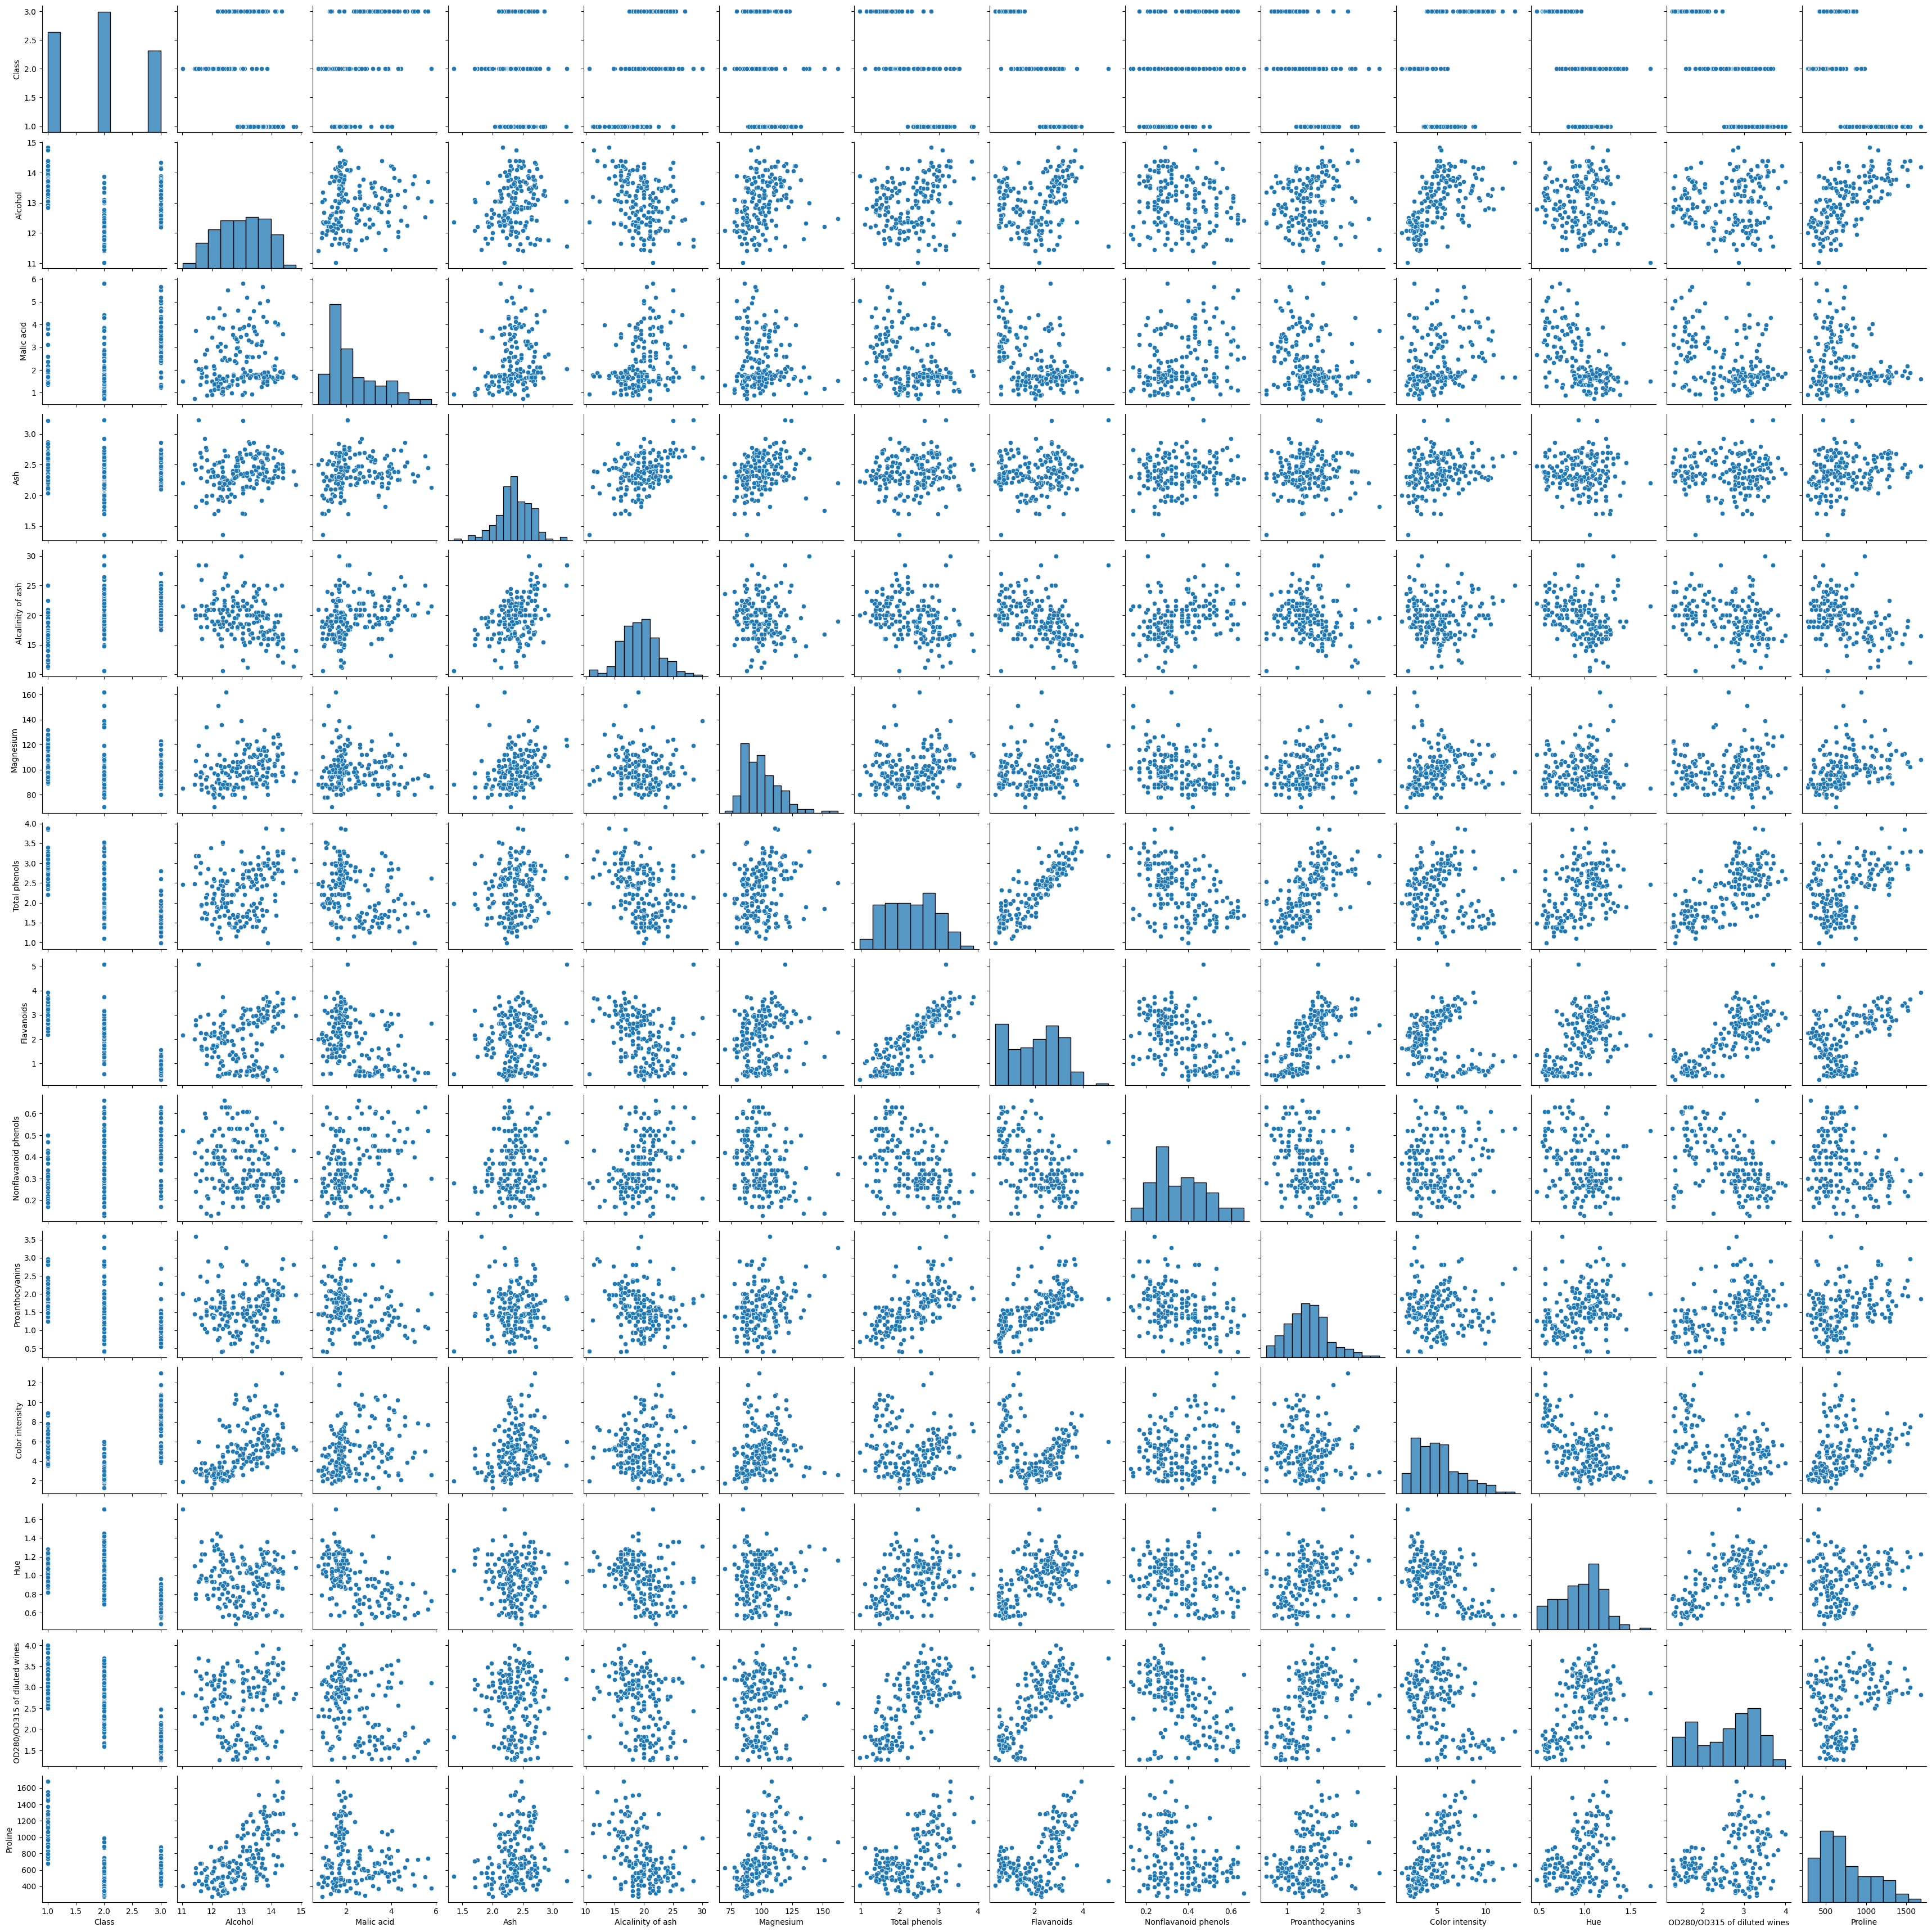

In [82]:
sns.pairplot(df)
plt.show()

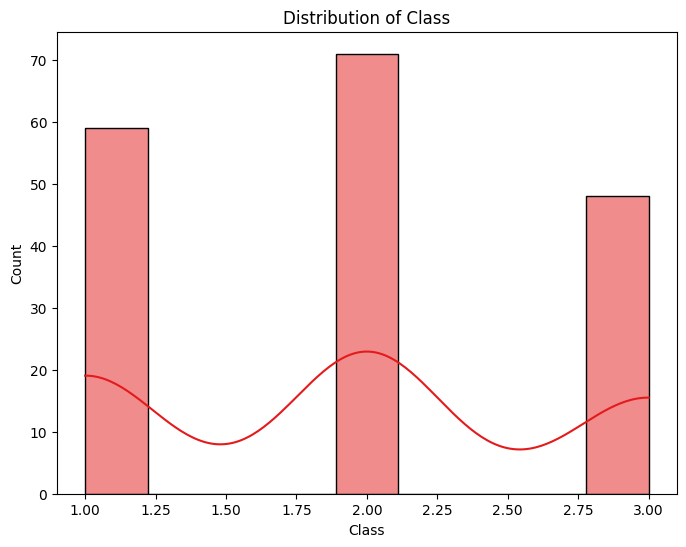

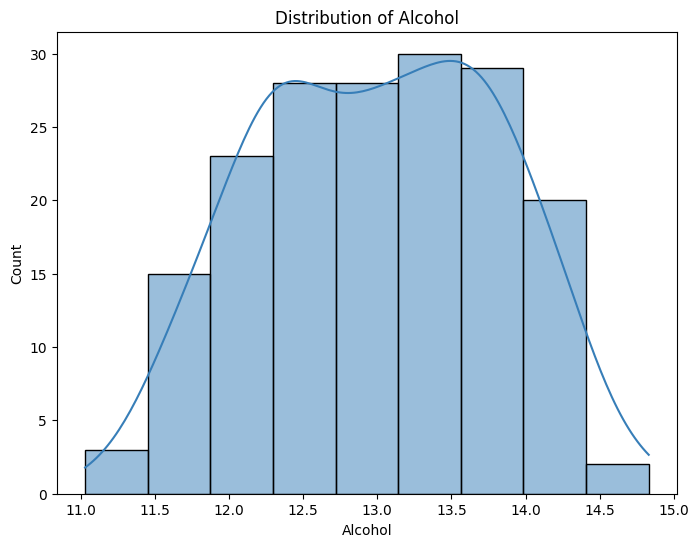

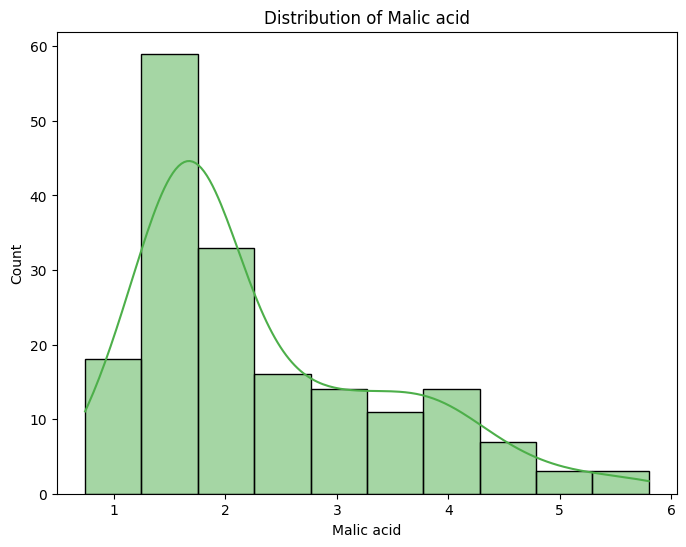

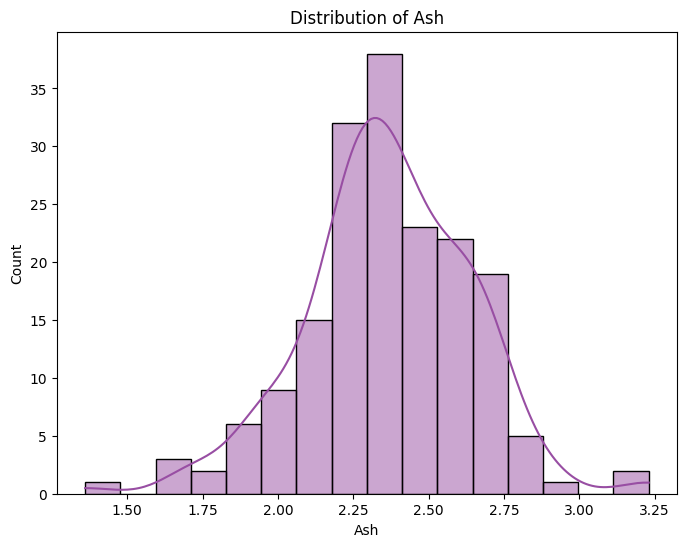

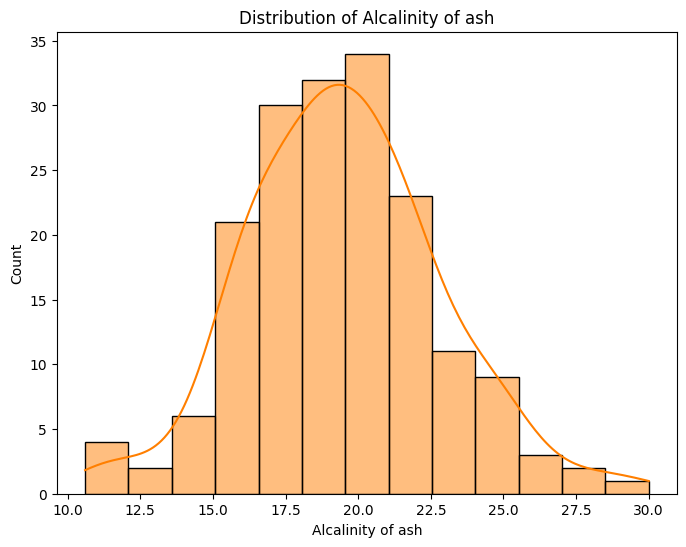

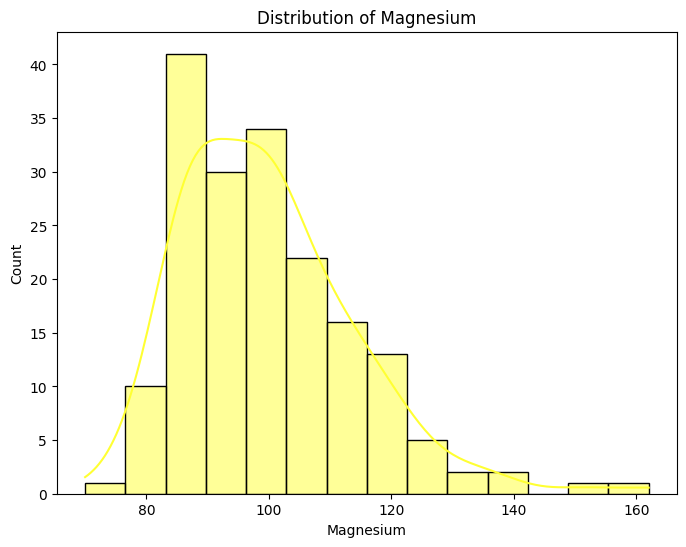

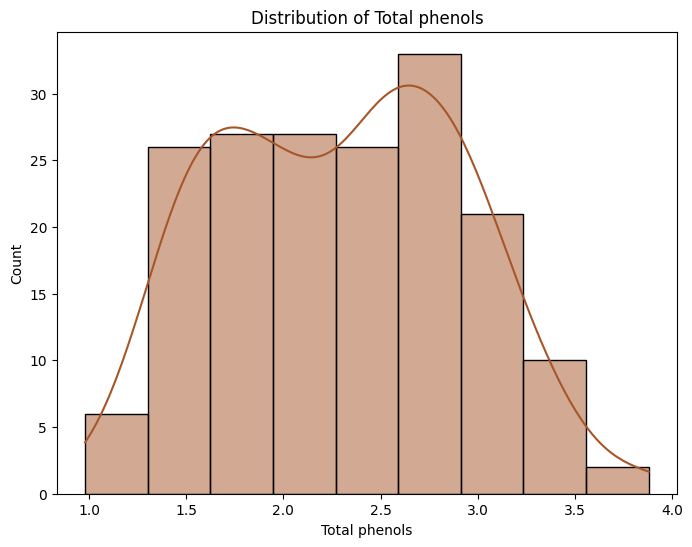

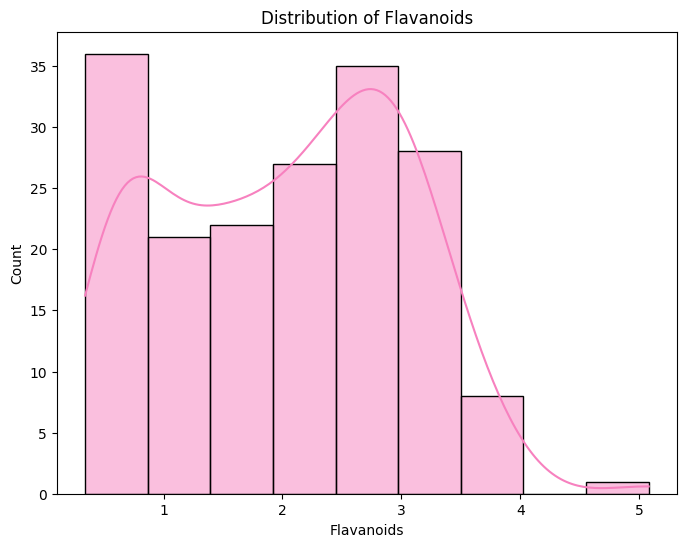

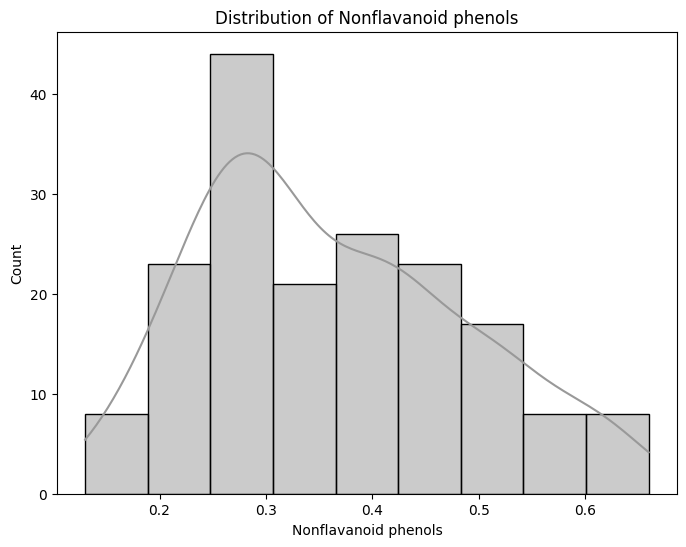

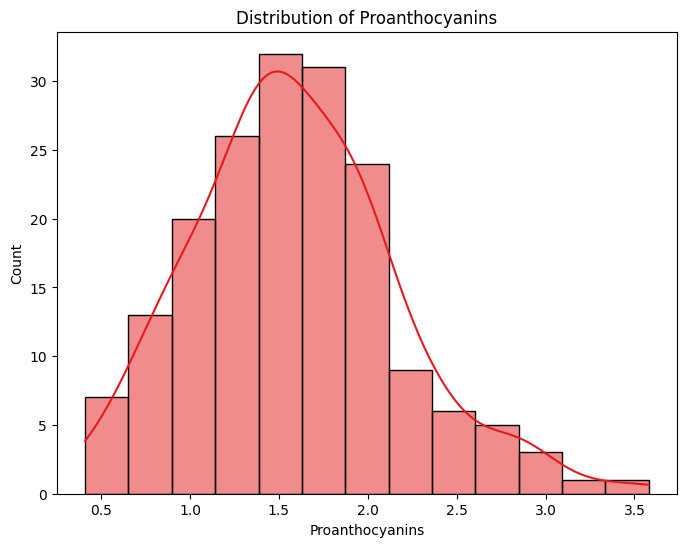

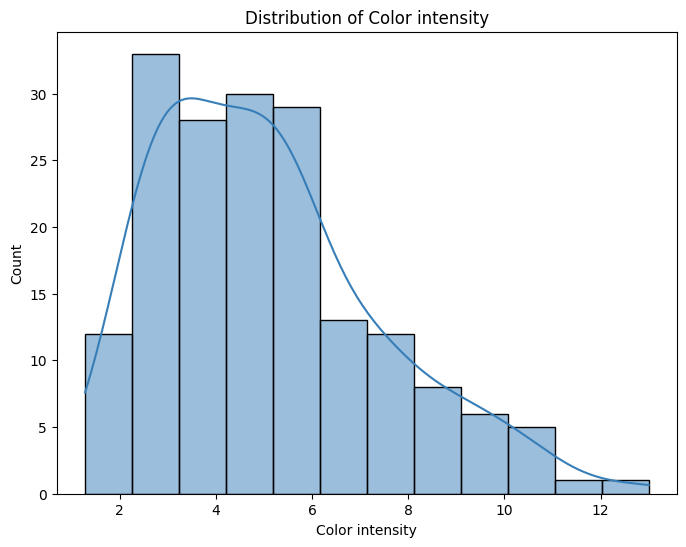

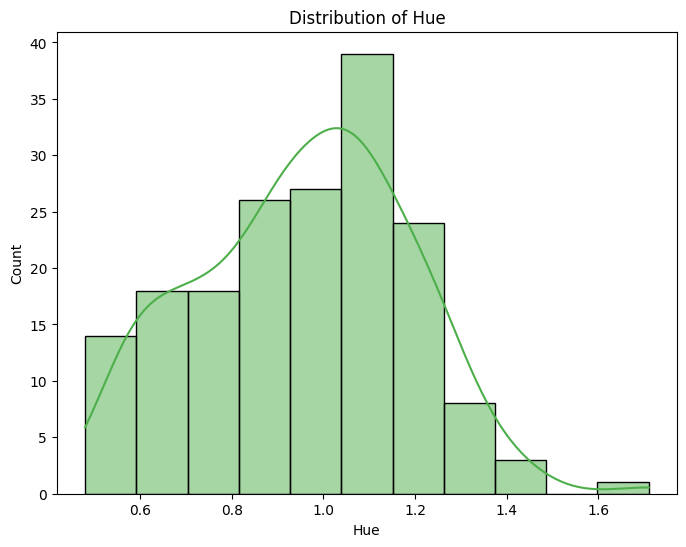

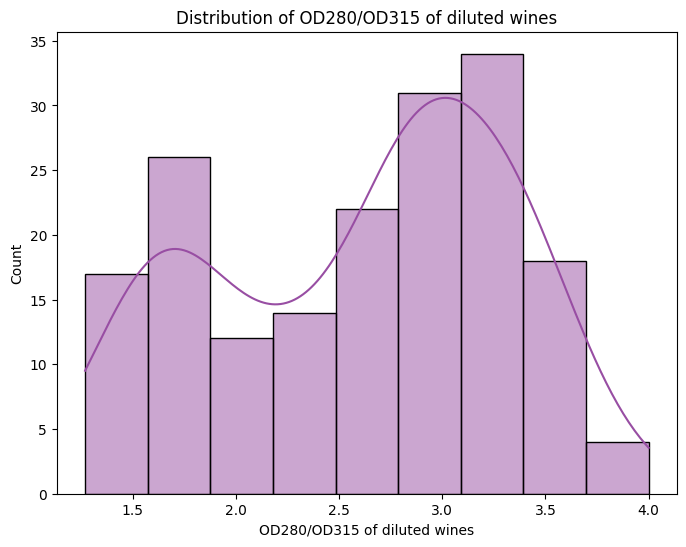

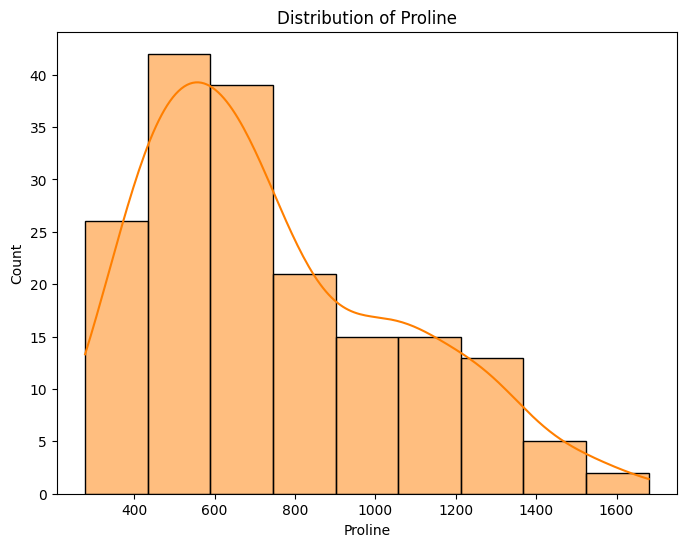

In [83]:
colors = sns.color_palette("Set1", n_colors=len(df.columns))
for i, column in enumerate(df.columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], color=colors[i], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


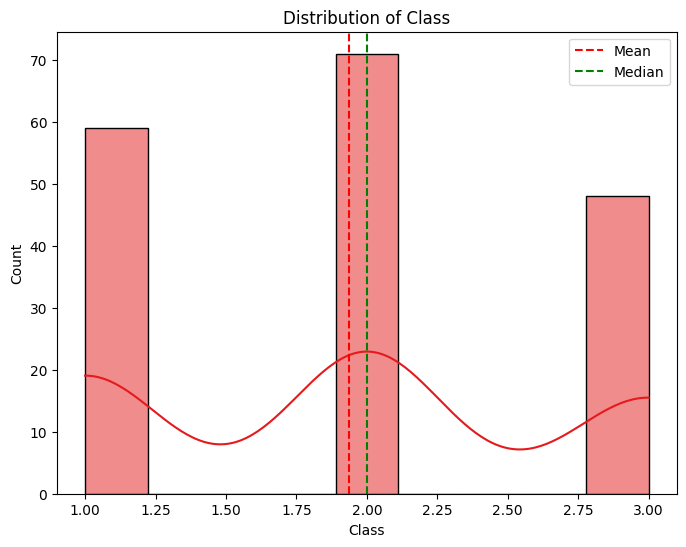

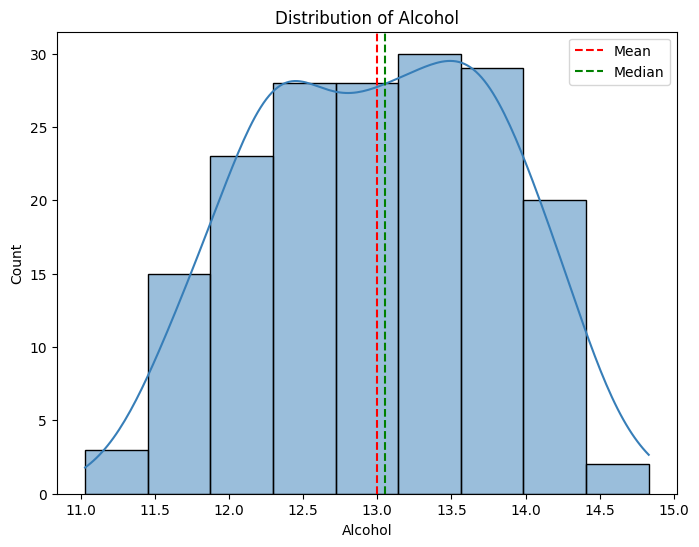

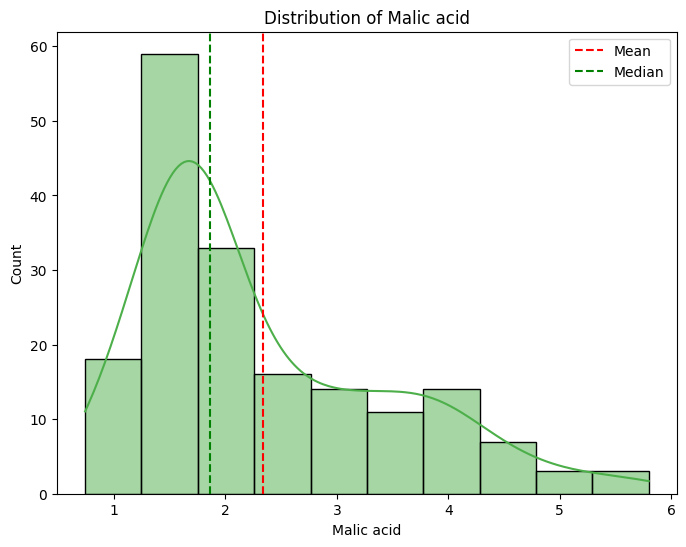

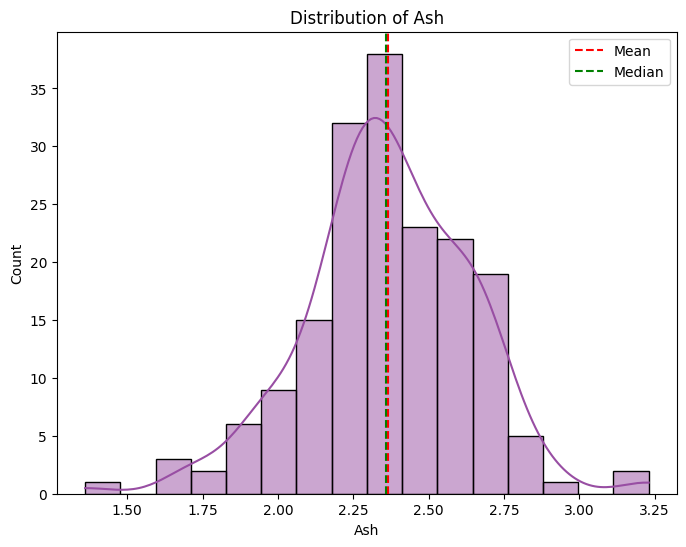

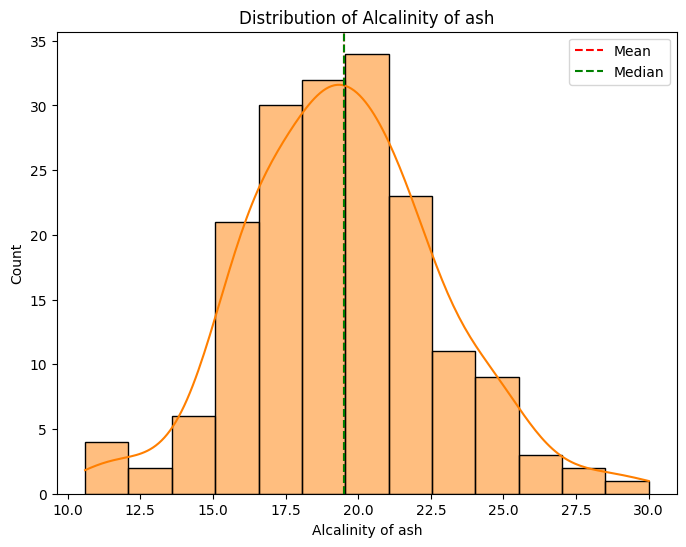

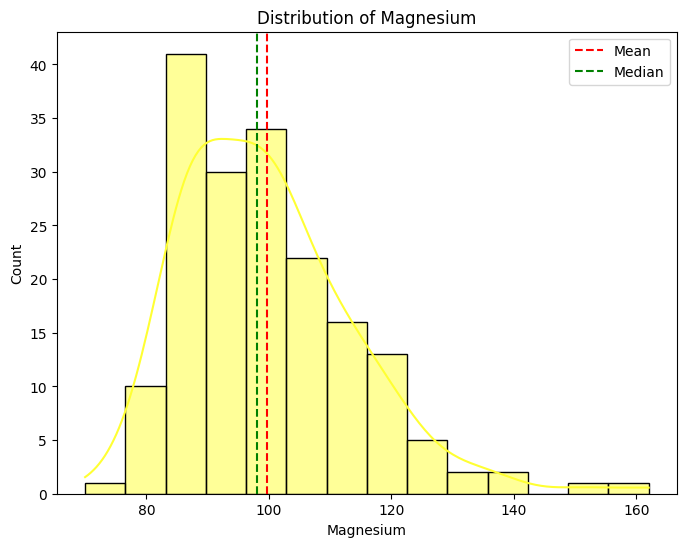

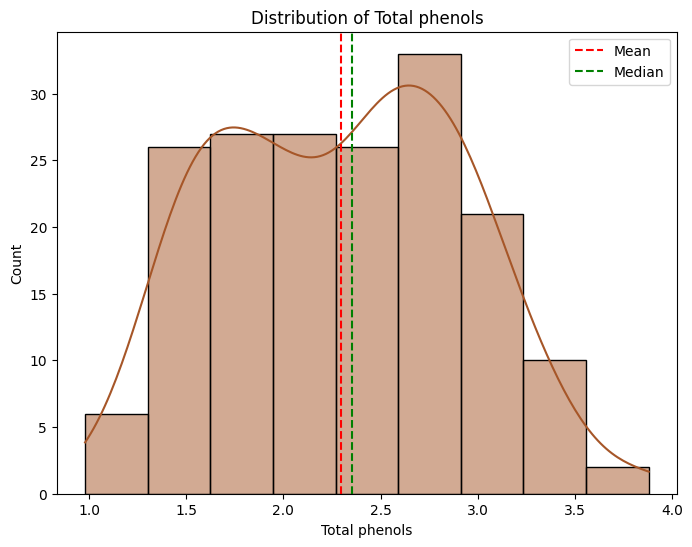

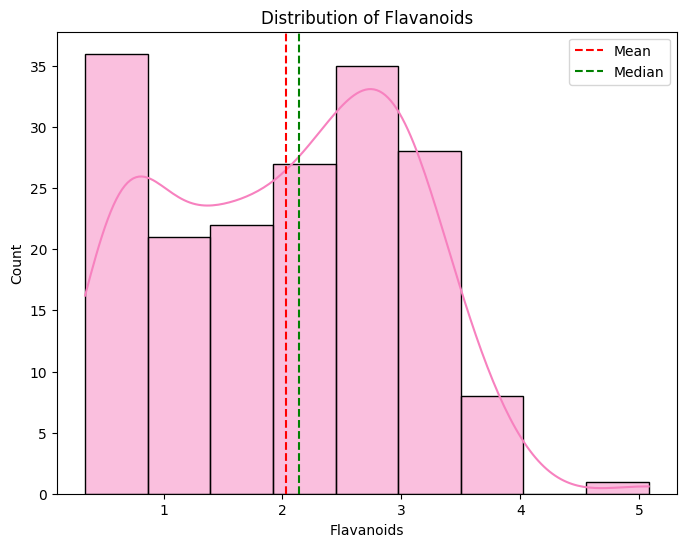

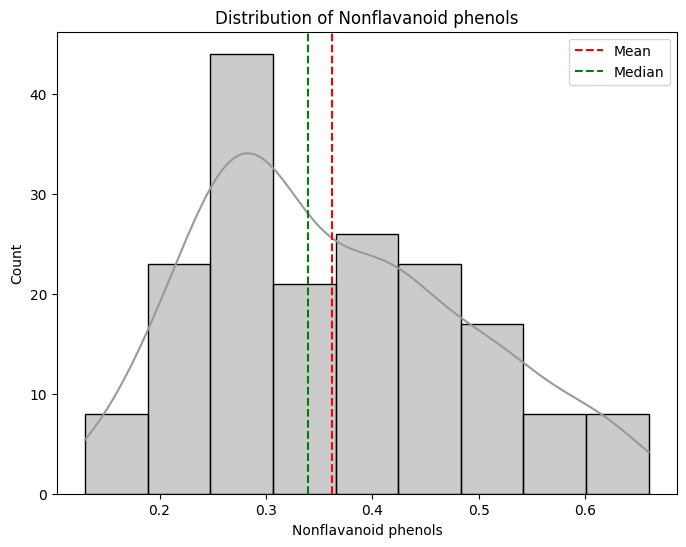

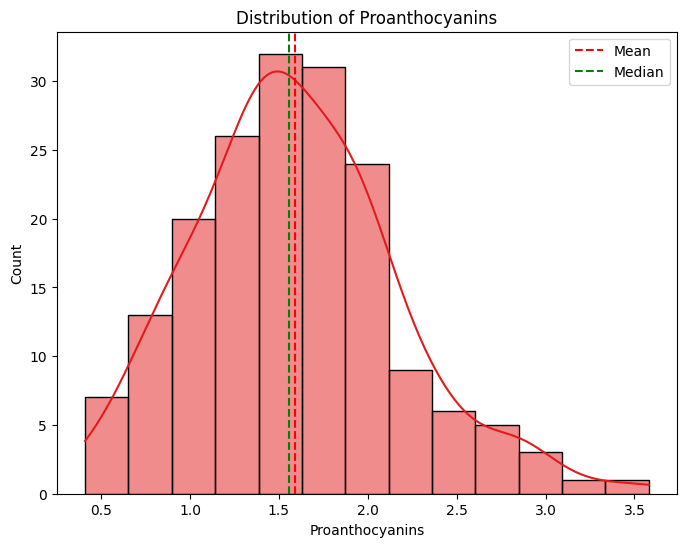

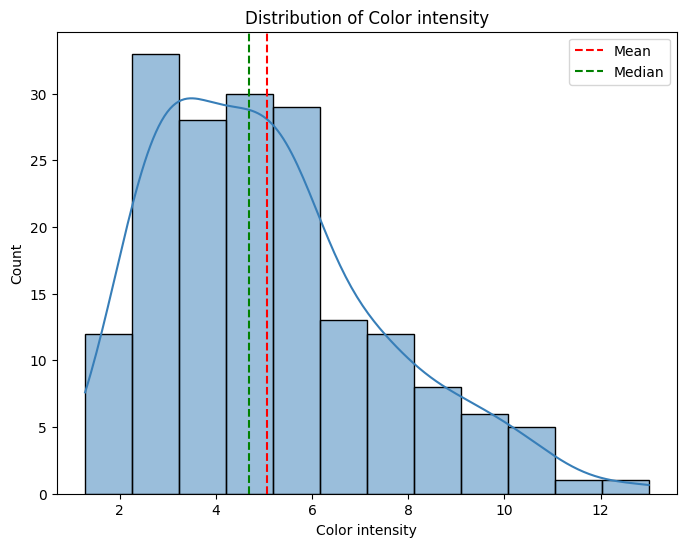

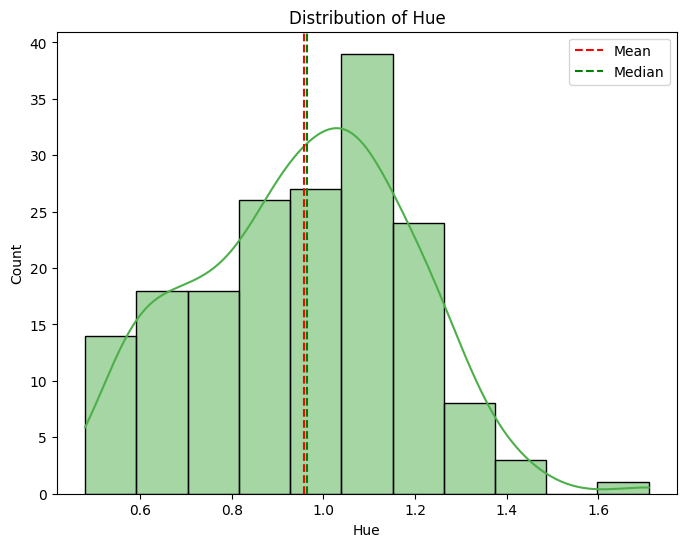

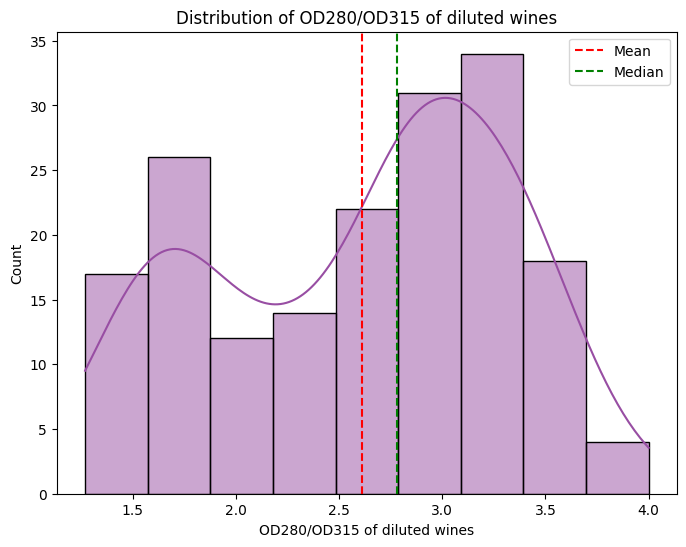

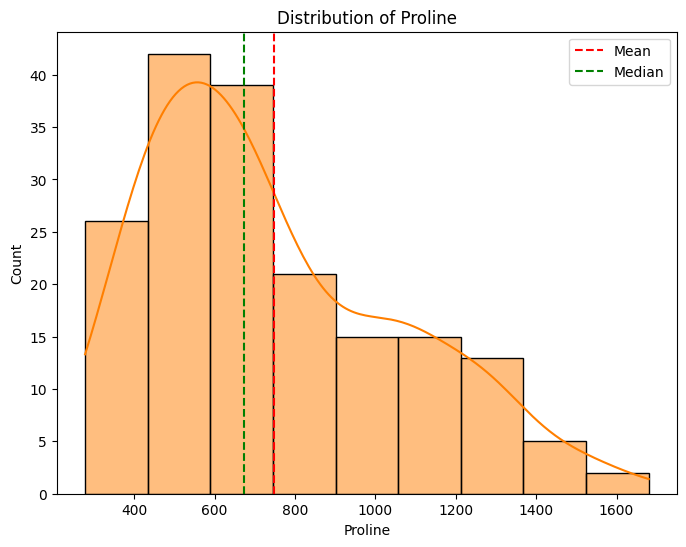

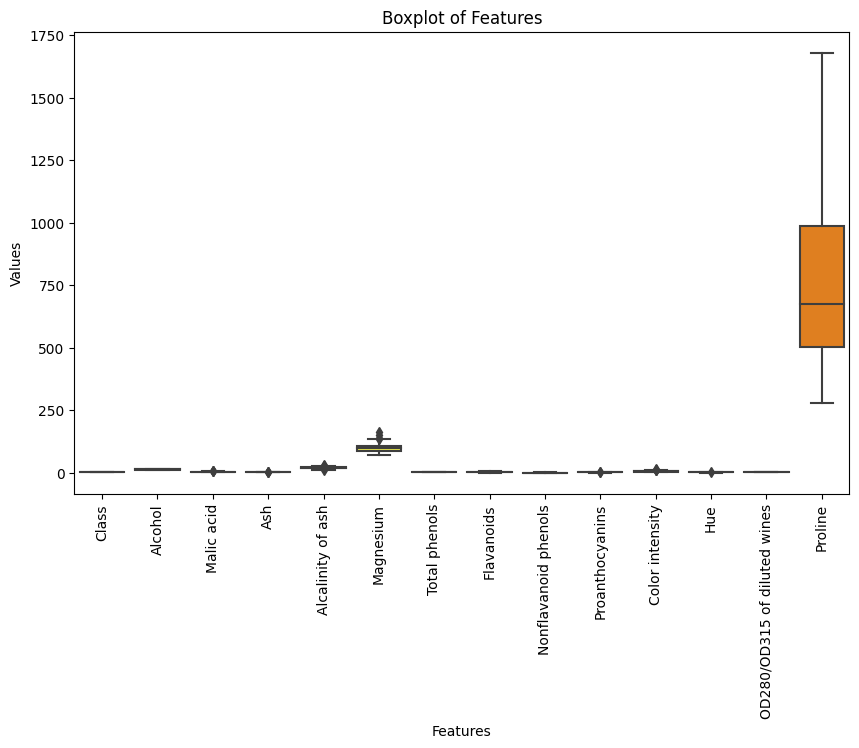

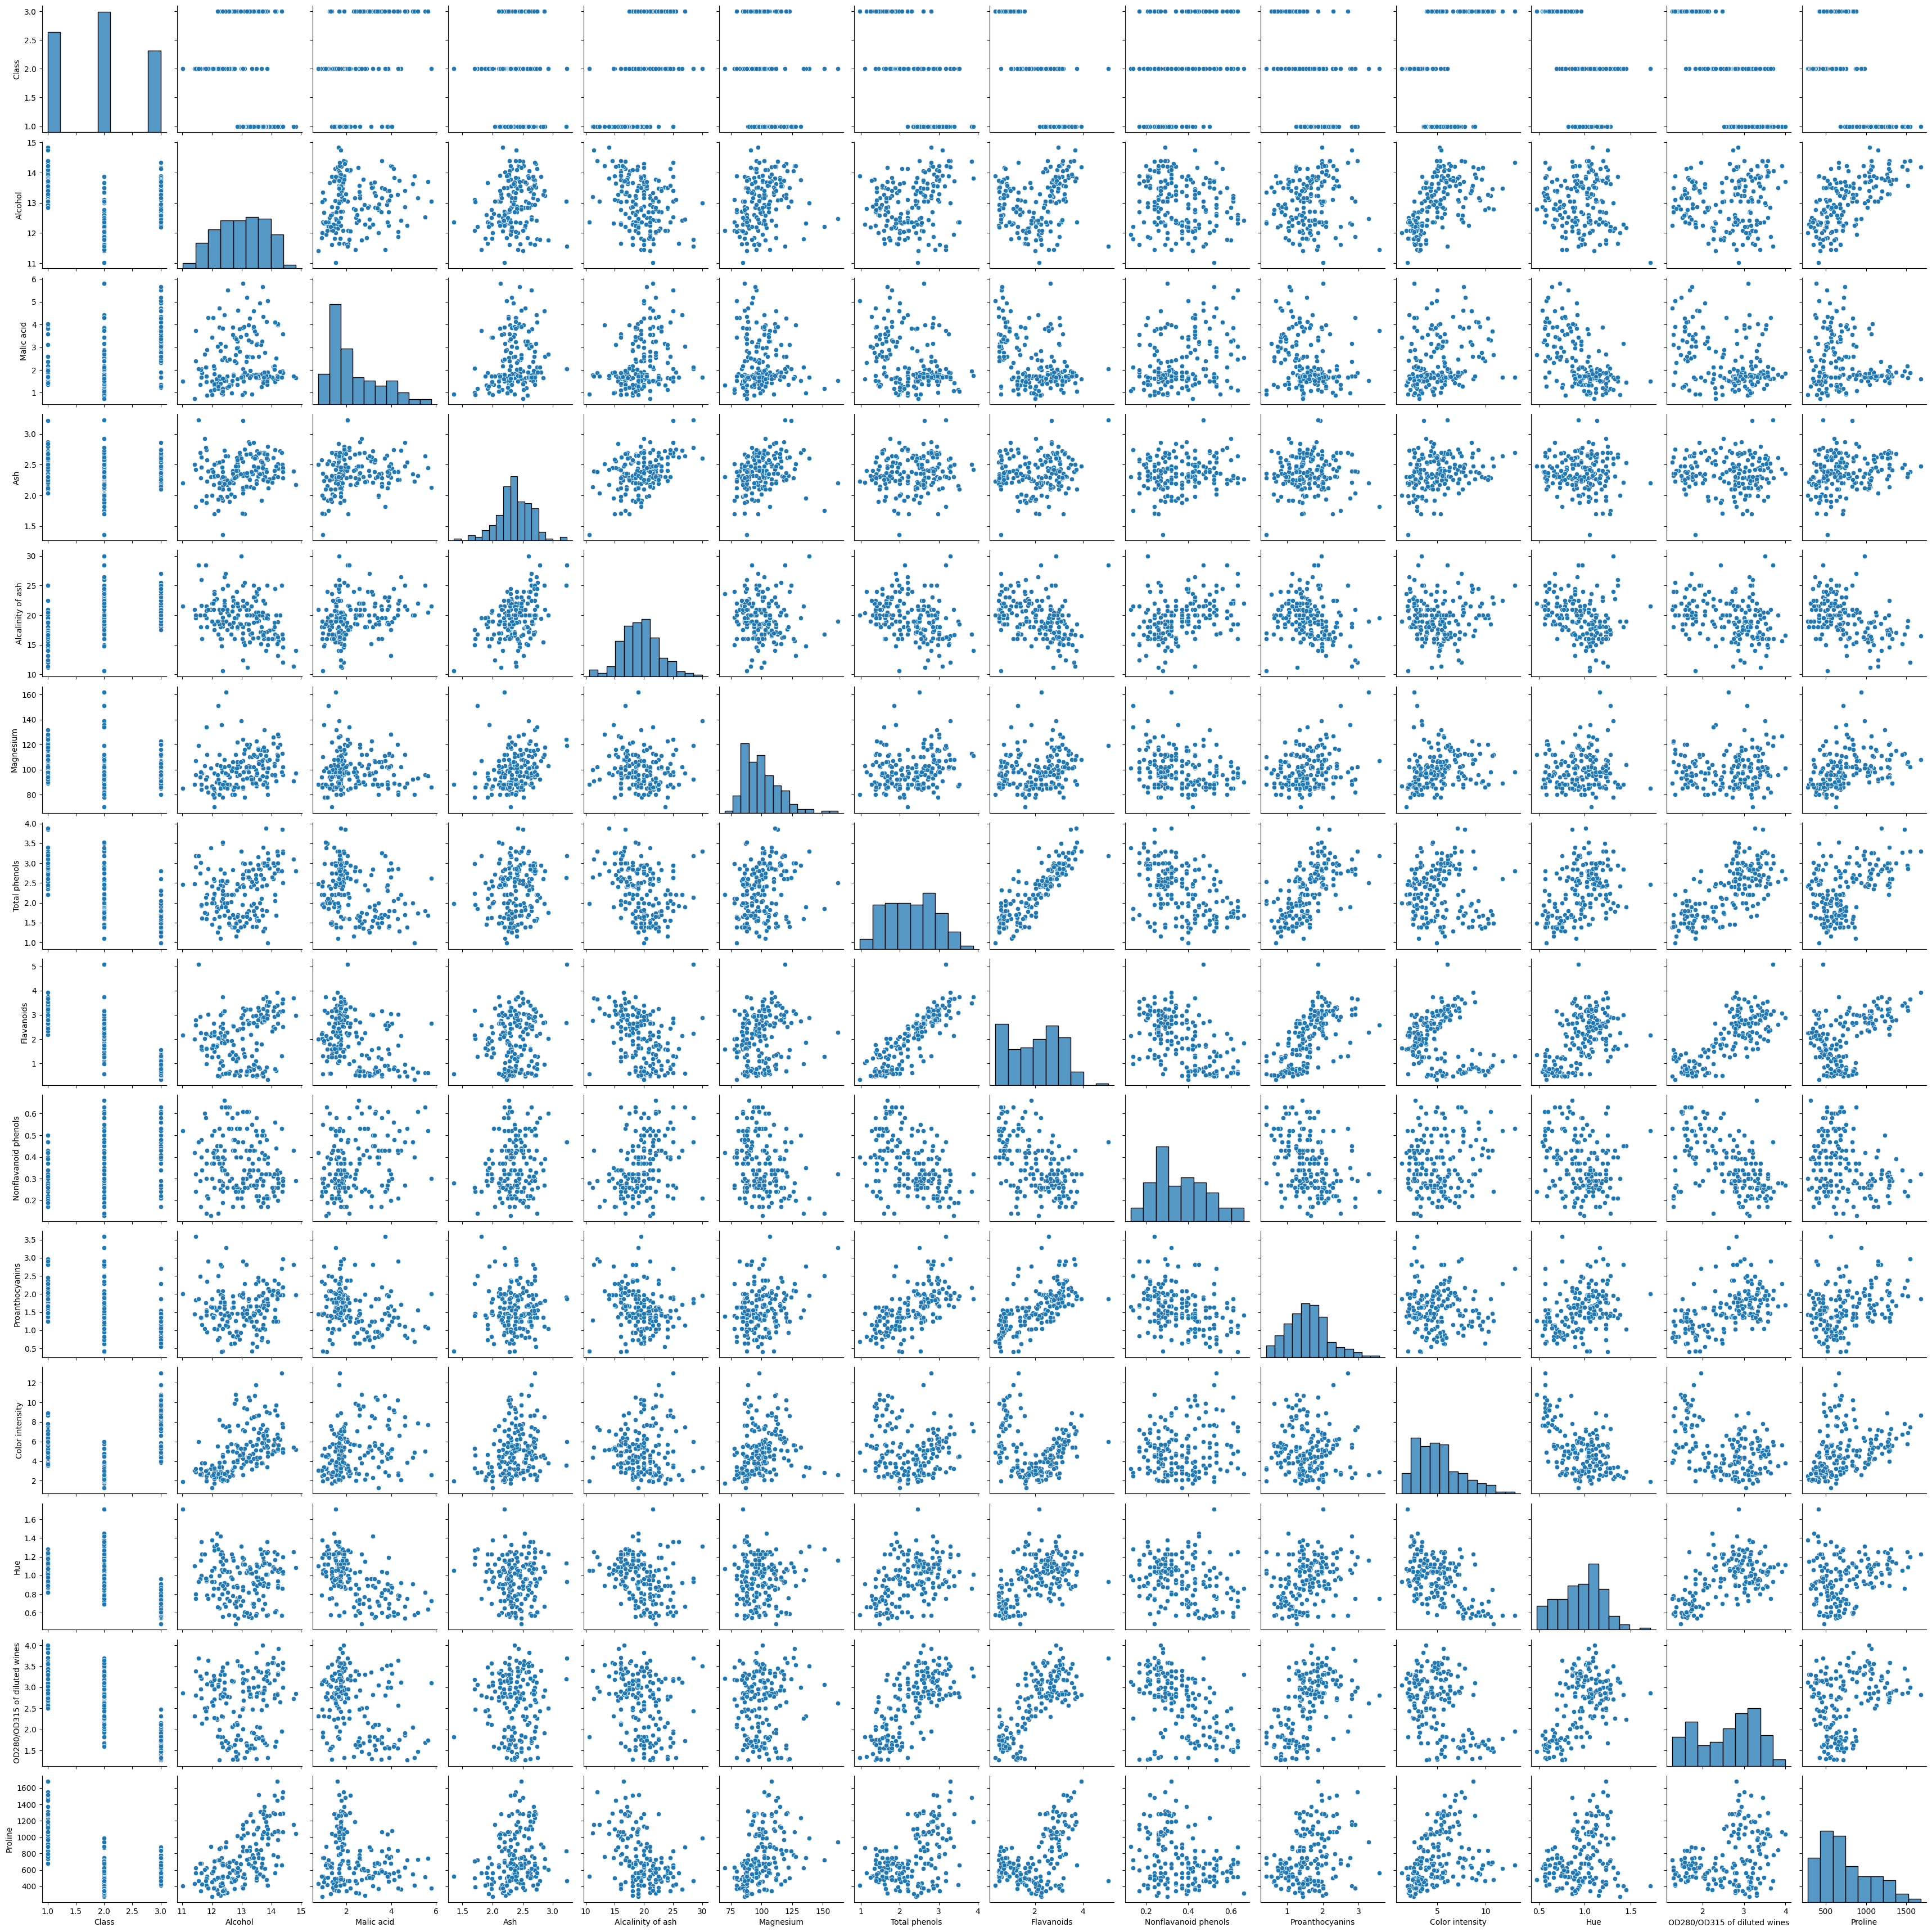

In [84]:
for i, column in enumerate(df.columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], color=colors[i], kde=True)
    plt.axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[column].median(), color='green', linestyle='--', label='Median')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='v', palette=colors)
plt.title("Boxplot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

sns.pairplot(df)
plt.show()


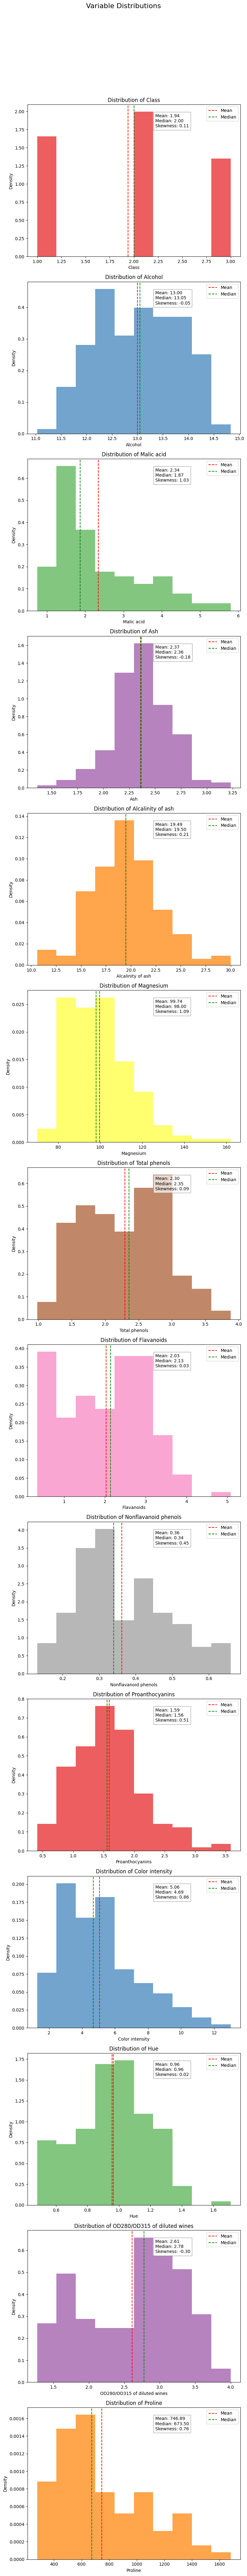

Skewness of variables:
Class                           0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64


In [85]:
# Add text box with important statistics
# Set title of subplot
# Add overall title and adjust spacing
# Check variables skewness

fig, axes = plt.subplots(nrows=len(df.columns), figsize=(8, 6*len(df.columns)))
fig.suptitle("Variable Distributions", fontsize=16)

for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[column], color=colors[i], density=True, alpha=0.7)
    ax.axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[column].median(), color='green', linestyle='--', label='Median')
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Density")
    ax.legend()

    # Add text box with important statistics
    stats_text = f"Mean: {df[column].mean():.2f}\nMedian: {df[column].median():.2f}\nSkewness: {skew(df[column]):.2f}"
    ax.text(0.6, 0.85, stats_text, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing for subplot titles and overall title
plt.show()

# Check variables skewness
skewness = df.skew()
print("Skewness of variables:")
print(skewness)


In [86]:
features_to_check = df.columns.tolist()

results_df = pd.DataFrame(columns=['Feature', 'Mean', 'Median', 'Skewness'])

skewness_results = []
for feature in features_to_check:
    feature_skewness = skew(df[feature])
    skewness_results.append((feature, feature_skewness))

skewness_df = pd.DataFrame(skewness_results, columns=['Feature', 'Skewness'])
skewness_df['Skewness Type'] = skewness_df['Skewness'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Symmetric')



In [87]:
subset_features = ['Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity']

subset_stats = df[subset_features].describe()
print("Descriptive Statistics:")
print(subset_stats)

Descriptive Statistics:
       Alcalinity of ash   Magnesium  Total phenols  Flavanoids  \
count         178.000000  178.000000     178.000000  178.000000   
mean           19.494944   99.741573       2.295112    2.029270   
std             3.339564   14.282484       0.625851    0.998859   
min            10.600000   70.000000       0.980000    0.340000   
25%            17.200000   88.000000       1.742500    1.205000   
50%            19.500000   98.000000       2.355000    2.135000   
75%            21.500000  107.000000       2.800000    2.875000   
max            30.000000  162.000000       3.880000    5.080000   

       Nonflavanoid phenols  Proanthocyanins  Color intensity  
count            178.000000       178.000000       178.000000  
mean               0.361854         1.590899         5.058090  
std                0.124453         0.572359         2.318286  
min                0.130000         0.410000         1.280000  
25%                0.270000         1.250000        

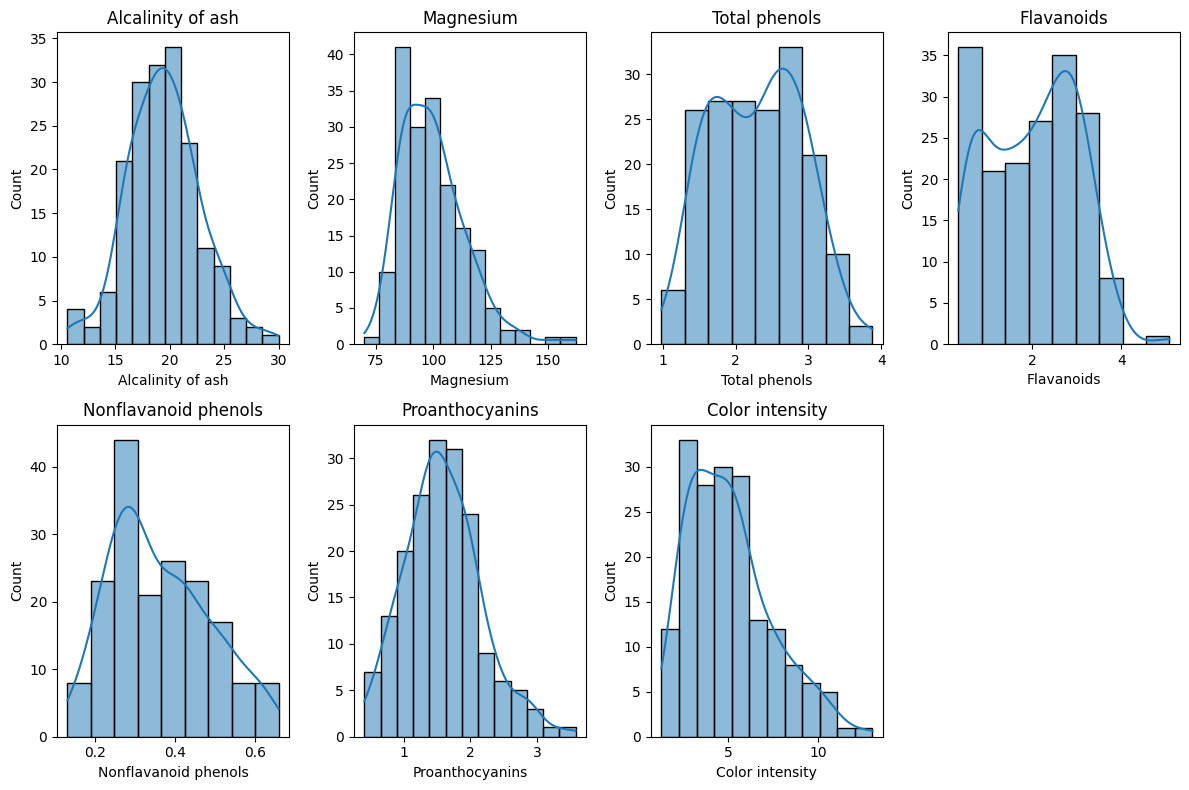

In [88]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(subset_features):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

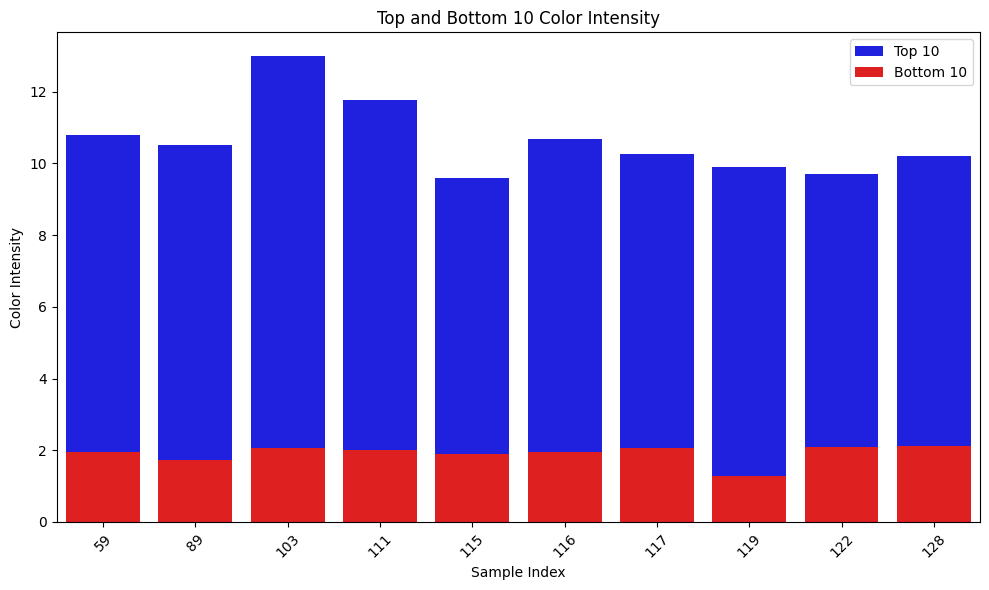

In [89]:
top_10_flavanoids = df.nlargest(10, 'Flavanoids')['Flavanoids']
bottom_10_flavanoids = df.nsmallest(10, 'Flavanoids')['Flavanoids']

top_10_color_intensity = df['Color intensity'].nlargest(10)
bottom_10_color_intensity = df['Color intensity'].nsmallest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_color_intensity.index, y=top_10_color_intensity, color='blue', label='Top 10')
sns.barplot(x=bottom_10_color_intensity.index, y=bottom_10_color_intensity, color='red', label='Bottom 10')

plt.xlabel('Sample Index')
plt.ylabel('Color Intensity')
plt.title('Top and Bottom 10 Color Intensity')

plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

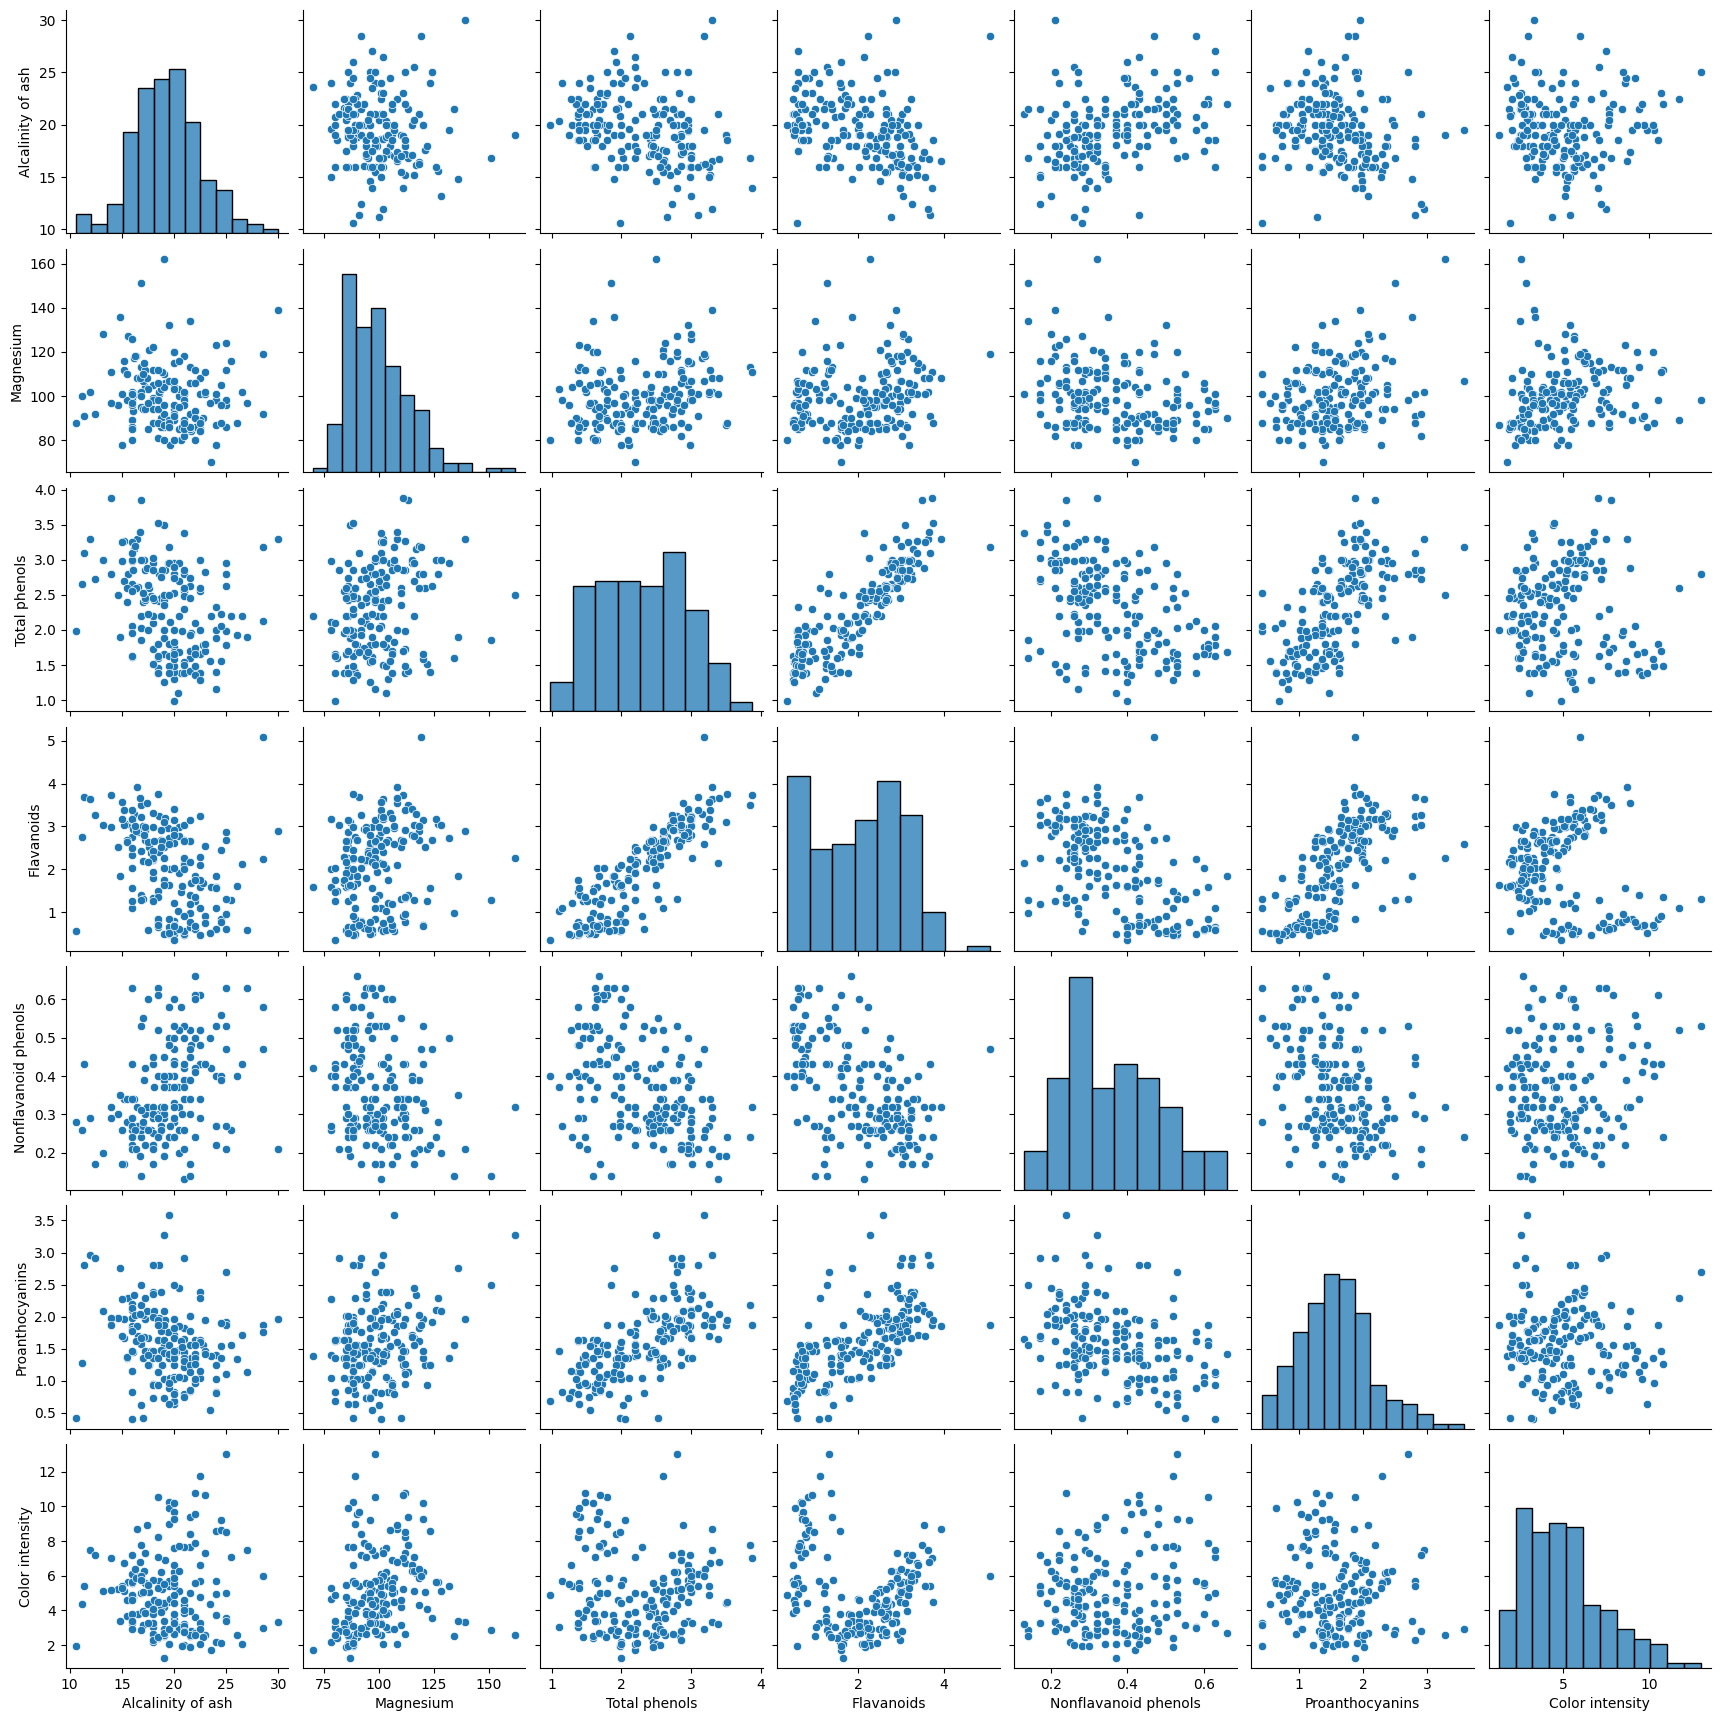

In [90]:
sns.pairplot(df, vars=['Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity'])
plt.show()

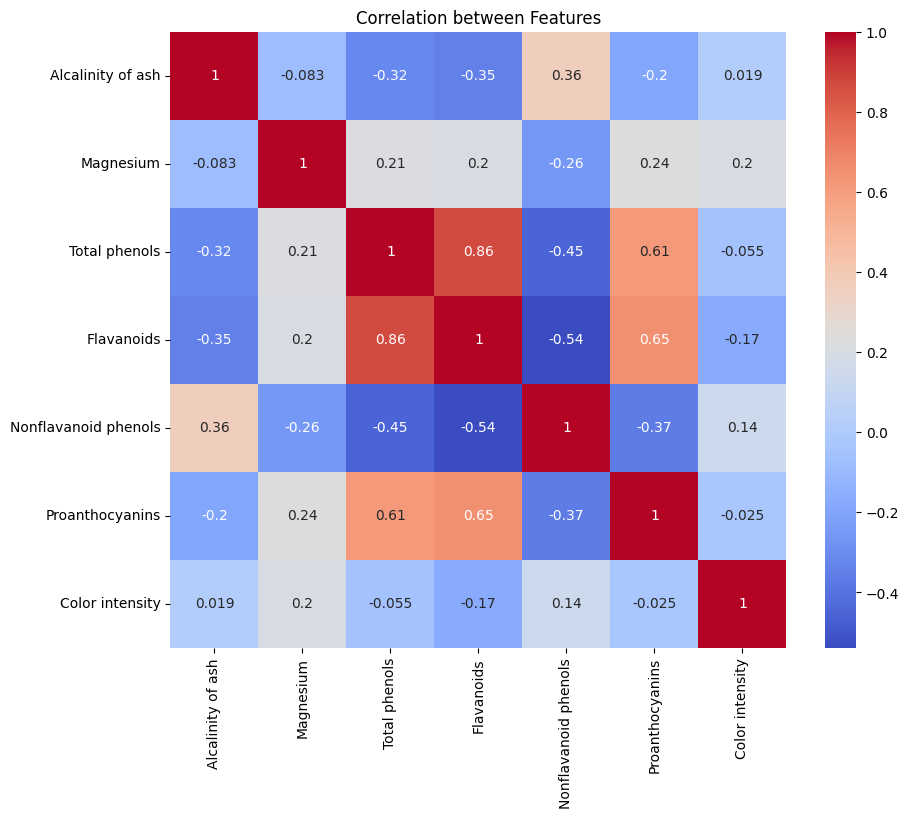

In [91]:
correlation_matrix = df[['Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation between Features")
plt.show()


# Model Building


1. Create PCA object and fit the scaled data
2. Transform the data to its principal components
3. Get the number of principal components
4. Print the number of principal components
5. Print the explained variance of each principal components
6. Print the total variance explained by all the principal components
7. Print the explained variance ratio of each principal components
8. Calculate percentage variation
9. Variance explained by each dimension
10. plot pca - plot PCA1 vs PCA2,plot PCA1 vs PCA3
12. Principal Component Data Decomposition
13. Initialize PCA with 5 components
14. Fit and transform the scaled data
15. Create a DataFrame from the transformed data

In [92]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA()

pca.fit(scaled_data)

transformed_data = pca.transform(scaled_data)

num_components = pca.n_components_

print("Number of Principal Components:", num_components)

Number of Principal Components: 14


In [93]:
print("Explained Variance of Each Principal Component:")
for i, explained_variance in enumerate(pca.explained_variance_):
    print("Principal Component", i+1, ":", explained_variance)

Explained Variance of Each Principal Component:
Principal Component 1 : 5.567224581550715
Principal Component 2 : 2.5111840225697892
Principal Component 3 : 1.454244133462665
Principal Component 4 : 0.9331603017536676
Principal Component 5 : 0.8824601592424317
Principal Component 6 : 0.6765793484551965
Principal Component 7 : 0.5569277656193098
Principal Component 8 : 0.3520117642105304
Principal Component 9 : 0.2962060201576635
Principal Component 10 : 0.2637880542715235
Principal Component 11 : 0.22712440110756812
Principal Component 12 : 0.16975036914276062
Principal Component 13 : 0.13029617973924262
Principal Component 14 : 0.058138943914682883


In [94]:
total_variance = sum(pca.explained_variance_)
print("Total Variance Explained by Principal Components:", total_variance)

Total Variance Explained by Principal Components: 14.079096045197751


In [95]:
print("Explained Variance Ratio of Each Principal Component:")
for i, explained_variance_ratio in enumerate(pca.explained_variance_ratio_):
    print("Principal Component", i+1, ":", explained_variance_ratio)

Explained Variance Ratio of Each Principal Component:
Principal Component 1 : 0.3954248599255521
Principal Component 2 : 0.1783625890830066
Principal Component 3 : 0.10329101590003674
Principal Component 4 : 0.06627984486773637
Principal Component 5 : 0.06267875127845518
Principal Component 6 : 0.04805559577711465
Principal Component 7 : 0.03955706842480649
Principal Component 8 : 0.025002440716398008
Principal Component 9 : 0.0210387100994809
Principal Component 10 : 0.018736149922174813
Principal Component 11 : 0.016132030094718912
Principal Component 12 : 0.012056908241680823
Principal Component 13 : 0.009254584194962251
Principal Component 14 : 0.004129451473875948


In [96]:
percentage_var = pca.explained_variance_ratio_ * 100
var_explained = pca.explained_variance_

print("Percentage Variation Explained by Each Dimension:")
for i, var in enumerate(percentage_var):
    print("Dimension", i+1, ": {:.2f}%".format(var))

print("\nVariance Explained by Each Dimension:")
for i, var in enumerate(var_explained):
    print("Dimension", i+1, ": {:.2f}".format(var))


Percentage Variation Explained by Each Dimension:
Dimension 1 : 39.54%
Dimension 2 : 17.84%
Dimension 3 : 10.33%
Dimension 4 : 6.63%
Dimension 5 : 6.27%
Dimension 6 : 4.81%
Dimension 7 : 3.96%
Dimension 8 : 2.50%
Dimension 9 : 2.10%
Dimension 10 : 1.87%
Dimension 11 : 1.61%
Dimension 12 : 1.21%
Dimension 13 : 0.93%
Dimension 14 : 0.41%

Variance Explained by Each Dimension:
Dimension 1 : 5.57
Dimension 2 : 2.51
Dimension 3 : 1.45
Dimension 4 : 0.93
Dimension 5 : 0.88
Dimension 6 : 0.68
Dimension 7 : 0.56
Dimension 8 : 0.35
Dimension 9 : 0.30
Dimension 10 : 0.26
Dimension 11 : 0.23
Dimension 12 : 0.17
Dimension 13 : 0.13
Dimension 14 : 0.06


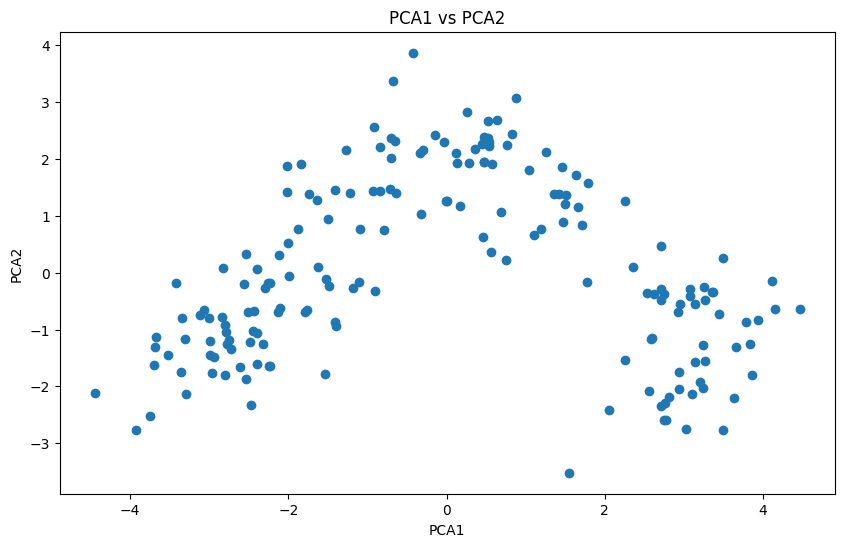

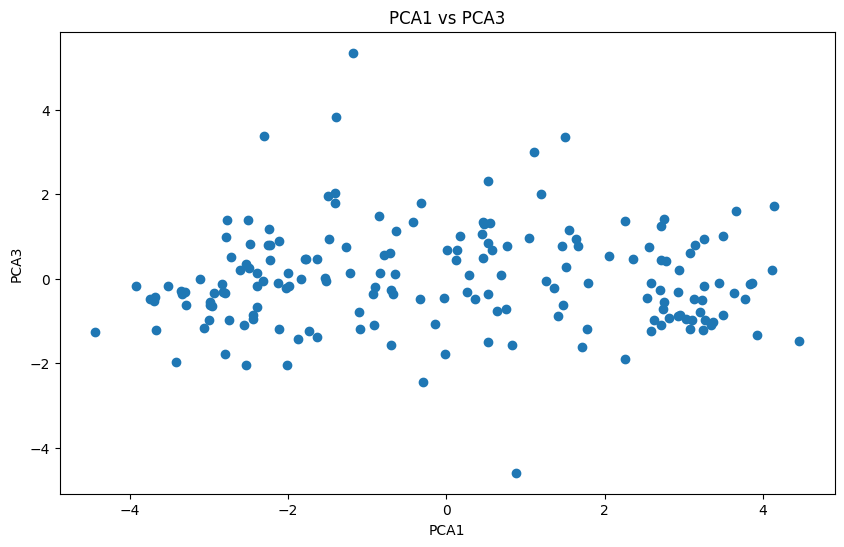

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 2])
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.title('PCA1 vs PCA3')
plt.show()

In [98]:
pca = PCA(n_components=5)

transformed_data = pca.fit_transform(scaled_data)

transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

transformed_df.head()


PC1       PC2       PC3       PC4       PC5
0 -3.522934 -1.453098 -0.164795 -0.013273  0.737345
1 -2.528858  0.330019 -2.026707 -0.417144 -0.283214
2 -2.785029 -1.036936  0.983238  0.664232 -0.387565
3 -3.922588 -2.768210 -0.174968  0.565088 -0.324360
4 -1.407511 -0.867773  2.025829 -0.440906  0.227949